Here we will try to fix the 2D VAE so that we can generate valid ringed data. Firstly we will try to generate some gaussians to diagnose the problem.

2022-02-22 21:14:55.941884: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-02-22 21:14:57.067732: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-02-22 21:14:57.067926: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-22 21:14:57.067936: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-22 21:14:57.067952: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pop-os): /proc/driver/nvidia/version does not exist
2022-02-22 21:14:57.068190: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the

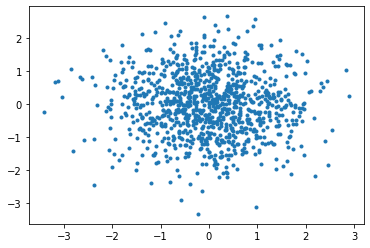

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


features_num = 1000
coding_size=1000

dataset = [(np.random.normal(0,1,1000),np.random.normal(0,1,1000)) for i in range (10)]
plt.plot(dataset[0][0],dataset[0][1],'.')
np.shape(dataset[0])

dataset = tf.constant(dataset,dtype=np.float32) 

In [9]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


class Sampling(keras.layers.Layer):
    """
    samples codings from a normal distribution.samples a random vector from a normal 
    distribution with mean 0 and standard deviation of 1 
    """
    def call(self, inputs):
        mean, log_var = inputs
        return tf.random.normal(tf.shape(log_var), mean=0.0, stddev=1.0) * tf.exp(log_var / 2) + mean


        # Encoder part

inputs = keras.layers.Input(shape=[2,features_num])#2D data"
z = keras.layers.Flatten()(inputs)
x = keras.layers.Dense(1000, activation='selu')(z)
x = keras.layers.Dense(50, activation='selu')(x)
codings_mean = keras.layers.Dense(coding_size)(x)
codings_log_var = keras.layers.Dense(coding_size)(x)
codings = Sampling()([codings_mean, codings_log_var])
encoder = keras.Model(inputs=inputs, outputs=[
                              codings_mean, codings_log_var, codings])

        # Decoder part

decoder_inputs = keras.layers.Input(shape=[coding_size])
x = keras.layers.Dense(50, activation='selu')(decoder_inputs)
x = keras.layers.Dense(1000, activation='selu')(x)
x = keras.layers.Dense(2*features_num,activation='linear')(x)
outputs = keras.layers.Reshape([2,features_num])(x)
decoder = keras.Model(inputs=decoder_inputs, outputs=outputs)
# try add another layer with a sigmoid function activation or a simple 
# activation where we can learn to do the offset of the mean

        # Combine Encoder and Decoder

_, _, codings = encoder(inputs)
reconstructions = decoder(codings)
kuyf = keras.Model(inputs=inputs, outputs=reconstructions)

latent_loss = -0.5 * tf.reduce_sum(1 + codings_log_var - tf.exp(
            codings_log_var) - tf.square(codings_mean))
kuyf.add_loss(tf.math.reduce_mean(latent_loss))
kuyf.compile(loss=tf.keras.losses.MeanSquaredError(),
                          optimizer=keras.optimizers.Adam())

Epoch 1/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.8970
Epoch 2/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.8972
Epoch 3/3000
1/1 [==============================] - 0s 40ms/step - loss: 0.8971
Epoch 4/3000
1/1 [==============================] - 0s 31ms/step - loss: 0.8970
Epoch 5/3000
1/1 [==============================] - 0s 34ms/step - loss: 0.8970
Epoch 6/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.8967
Epoch 7/3000
1/1 [==============================] - 0s 40ms/step - loss: 0.8968
Epoch 8/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.8969
Epoch 9/3000
1/1 [==============================] - 0s 31ms/step - loss: 0.8965
Epoch 10/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.8968
Epoch 11/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.8971
Epoch 12/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.8971
Epoch 13/3000
1/1 [==================

1/1 [==============================] - 0s 27ms/step - loss: 0.8964
Epoch 202/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.8968
Epoch 203/3000
1/1 [==============================] - 0s 32ms/step - loss: 0.8964
Epoch 204/3000
1/1 [==============================] - 0s 38ms/step - loss: 0.8967
Epoch 205/3000
1/1 [==============================] - 0s 34ms/step - loss: 0.8960
Epoch 206/3000
1/1 [==============================] - 0s 33ms/step - loss: 0.8965
Epoch 207/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.8965
Epoch 208/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.8968
Epoch 209/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.8967
Epoch 210/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.8965
Epoch 211/3000
1/1 [==============================] - 0s 34ms/step - loss: 0.8963
Epoch 212/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.8968
Epoch 213/3000
1/1 [===========

1/1 [==============================] - 0s 45ms/step - loss: 0.8961
Epoch 302/3000
1/1 [==============================] - 0s 48ms/step - loss: 0.8966
Epoch 303/3000
1/1 [==============================] - 0s 44ms/step - loss: 0.8961
Epoch 304/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.8960
Epoch 305/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.8963
Epoch 306/3000
1/1 [==============================] - 0s 32ms/step - loss: 0.8963
Epoch 307/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.8964
Epoch 308/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.8962
Epoch 309/3000
1/1 [==============================] - 0s 40ms/step - loss: 0.8964
Epoch 310/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.8958
Epoch 311/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.8961
Epoch 312/3000
1/1 [==============================] - 0s 33ms/step - loss: 0.8963
Epoch 313/3000
1/1 [===========

1/1 [==============================] - 0s 30ms/step - loss: 0.8963
Epoch 402/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.8962
Epoch 403/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.8963
Epoch 404/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.8962
Epoch 405/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.8963
Epoch 406/3000
1/1 [==============================] - 0s 27ms/step - loss: 0.8962
Epoch 407/3000
1/1 [==============================] - 0s 39ms/step - loss: 0.8964
Epoch 408/3000
1/1 [==============================] - 0s 31ms/step - loss: 0.8964
Epoch 409/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.8963
Epoch 410/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.8962
Epoch 411/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.8963
Epoch 412/3000
1/1 [==============================] - 0s 31ms/step - loss: 0.8961
Epoch 413/3000
1/1 [===========

1/1 [==============================] - 0s 36ms/step - loss: 0.8961
Epoch 502/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.8960
Epoch 503/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.8960
Epoch 504/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.8962
Epoch 505/3000
1/1 [==============================] - 0s 38ms/step - loss: 0.8960
Epoch 506/3000
1/1 [==============================] - 0s 34ms/step - loss: 0.8961
Epoch 507/3000
1/1 [==============================] - 0s 35ms/step - loss: 0.8961
Epoch 508/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.8961
Epoch 509/3000
1/1 [==============================] - 0s 38ms/step - loss: 0.8960
Epoch 510/3000
1/1 [==============================] - 0s 35ms/step - loss: 0.8962
Epoch 511/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.8961
Epoch 512/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.8959
Epoch 513/3000
1/1 [===========

1/1 [==============================] - 0s 31ms/step - loss: 0.8959
Epoch 602/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.8959
Epoch 603/3000
1/1 [==============================] - 0s 31ms/step - loss: 0.8959
Epoch 604/3000
1/1 [==============================] - 0s 32ms/step - loss: 0.8959
Epoch 605/3000
1/1 [==============================] - 0s 31ms/step - loss: 0.8960
Epoch 606/3000
1/1 [==============================] - 0s 34ms/step - loss: 0.8960
Epoch 607/3000
1/1 [==============================] - 0s 33ms/step - loss: 0.8960
Epoch 608/3000
1/1 [==============================] - 0s 35ms/step - loss: 0.8961
Epoch 609/3000
1/1 [==============================] - 0s 35ms/step - loss: 0.8959
Epoch 610/3000
1/1 [==============================] - 0s 31ms/step - loss: 0.8960
Epoch 611/3000
1/1 [==============================] - 0s 34ms/step - loss: 0.8958
Epoch 612/3000
1/1 [==============================] - 0s 34ms/step - loss: 0.8959
Epoch 613/3000
1/1 [===========

1/1 [==============================] - 0s 39ms/step - loss: 0.8959
Epoch 702/3000
1/1 [==============================] - 0s 38ms/step - loss: 0.8959
Epoch 703/3000
1/1 [==============================] - 0s 31ms/step - loss: 0.8959
Epoch 704/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.8961
Epoch 705/3000
1/1 [==============================] - 0s 34ms/step - loss: 0.8958
Epoch 706/3000
1/1 [==============================] - 0s 38ms/step - loss: 0.8960
Epoch 707/3000
1/1 [==============================] - 0s 31ms/step - loss: 0.8958
Epoch 708/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.8961
Epoch 709/3000
1/1 [==============================] - 0s 39ms/step - loss: 0.8958
Epoch 710/3000
1/1 [==============================] - 0s 38ms/step - loss: 0.8958
Epoch 711/3000
1/1 [==============================] - 0s 32ms/step - loss: 0.8959
Epoch 712/3000
1/1 [==============================] - 0s 32ms/step - loss: 0.8956
Epoch 713/3000
1/1 [===========

1/1 [==============================] - 0s 35ms/step - loss: 0.8961
Epoch 802/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.8959
Epoch 803/3000
1/1 [==============================] - 0s 31ms/step - loss: 0.8959
Epoch 804/3000
1/1 [==============================] - 0s 32ms/step - loss: 0.8961
Epoch 805/3000
1/1 [==============================] - 0s 35ms/step - loss: 0.8960
Epoch 806/3000
1/1 [==============================] - 0s 27ms/step - loss: 0.8960
Epoch 807/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.8960
Epoch 808/3000
1/1 [==============================] - 0s 34ms/step - loss: 0.8960
Epoch 809/3000
1/1 [==============================] - 0s 31ms/step - loss: 0.8960
Epoch 810/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.8961
Epoch 811/3000
1/1 [==============================] - 0s 32ms/step - loss: 0.8962
Epoch 812/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.8962
Epoch 813/3000
1/1 [===========

1/1 [==============================] - 0s 32ms/step - loss: 0.8965
Epoch 902/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.8965
Epoch 903/3000
1/1 [==============================] - 0s 32ms/step - loss: 0.8964
Epoch 904/3000
1/1 [==============================] - 0s 32ms/step - loss: 0.8963
Epoch 905/3000
1/1 [==============================] - 0s 34ms/step - loss: 0.8962
Epoch 906/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.8964
Epoch 907/3000
1/1 [==============================] - 0s 38ms/step - loss: 0.8963
Epoch 908/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.8964
Epoch 909/3000
1/1 [==============================] - 0s 39ms/step - loss: 0.8966
Epoch 910/3000
1/1 [==============================] - 0s 38ms/step - loss: 0.8965
Epoch 911/3000
1/1 [==============================] - 0s 38ms/step - loss: 0.8964
Epoch 912/3000
1/1 [==============================] - 0s 32ms/step - loss: 0.8964
Epoch 913/3000
1/1 [===========

1/1 [==============================] - 0s 33ms/step - loss: 0.8971
Epoch 1002/3000
1/1 [==============================] - 0s 32ms/step - loss: 0.8969
Epoch 1003/3000
1/1 [==============================] - 0s 34ms/step - loss: 0.8969
Epoch 1004/3000
1/1 [==============================] - 0s 35ms/step - loss: 0.8971
Epoch 1005/3000
1/1 [==============================] - 0s 40ms/step - loss: 0.8973
Epoch 1006/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.8976
Epoch 1007/3000
1/1 [==============================] - 0s 54ms/step - loss: 0.8974
Epoch 1008/3000
1/1 [==============================] - 0s 48ms/step - loss: 0.8971
Epoch 1009/3000
1/1 [==============================] - 0s 40ms/step - loss: 0.8967
Epoch 1010/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.8966
Epoch 1011/3000
1/1 [==============================] - 0s 33ms/step - loss: 0.8968
Epoch 1012/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.8970
Epoch 1013/3000
1/1 

1/1 [==============================] - 0s 31ms/step - loss: 0.8973
Epoch 1198/3000
1/1 [==============================] - 0s 35ms/step - loss: 0.8976
Epoch 1199/3000
1/1 [==============================] - 0s 35ms/step - loss: 0.8977
Epoch 1200/3000
1/1 [==============================] - 0s 32ms/step - loss: 0.8979
Epoch 1201/3000
1/1 [==============================] - 0s 34ms/step - loss: 0.8982
Epoch 1202/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.8983
Epoch 1203/3000
1/1 [==============================] - 0s 35ms/step - loss: 0.8985
Epoch 1204/3000
1/1 [==============================] - 0s 33ms/step - loss: 0.8987
Epoch 1205/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.8989
Epoch 1206/3000
1/1 [==============================] - 0s 39ms/step - loss: 0.8990
Epoch 1207/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.8988
Epoch 1208/3000
1/1 [==============================] - 0s 34ms/step - loss: 0.8987
Epoch 1209/3000
1/1 

1/1 [==============================] - 0s 35ms/step - loss: 0.9025
Epoch 1394/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.9015
Epoch 1395/3000
1/1 [==============================] - 0s 38ms/step - loss: 0.9008
Epoch 1396/3000
1/1 [==============================] - 0s 39ms/step - loss: 0.9010
Epoch 1397/3000
1/1 [==============================] - 0s 34ms/step - loss: 0.9007
Epoch 1398/3000
1/1 [==============================] - 0s 32ms/step - loss: 0.9002
Epoch 1399/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.8991
Epoch 1400/3000
1/1 [==============================] - 0s 40ms/step - loss: 0.8989
Epoch 1401/3000
1/1 [==============================] - 0s 33ms/step - loss: 0.8989
Epoch 1402/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.8984
Epoch 1403/3000
1/1 [==============================] - 0s 39ms/step - loss: 0.8984
Epoch 1404/3000
1/1 [==============================] - 0s 38ms/step - loss: 0.8986
Epoch 1405/3000
1/1 

1/1 [==============================] - 0s 38ms/step - loss: 0.9054
Epoch 1590/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.9052
Epoch 1591/3000
1/1 [==============================] - 0s 32ms/step - loss: 0.9053
Epoch 1592/3000
1/1 [==============================] - 0s 31ms/step - loss: 0.9051
Epoch 1593/3000
1/1 [==============================] - 0s 32ms/step - loss: 0.9046
Epoch 1594/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.9039
Epoch 1595/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.9030
Epoch 1596/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.9022
Epoch 1597/3000
1/1 [==============================] - 0s 33ms/step - loss: 0.9016
Epoch 1598/3000
1/1 [==============================] - 0s 33ms/step - loss: 0.9015
Epoch 1599/3000
1/1 [==============================] - 0s 33ms/step - loss: 0.9016
Epoch 1600/3000
1/1 [==============================] - 0s 31ms/step - loss: 0.9018
Epoch 1601/3000
1/1 

1/1 [==============================] - 0s 38ms/step - loss: 0.9067
Epoch 1786/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.9076
Epoch 1787/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.9085
Epoch 1788/3000
1/1 [==============================] - 0s 49ms/step - loss: 0.9096
Epoch 1789/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.9106
Epoch 1790/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.9114
Epoch 1791/3000
1/1 [==============================] - 0s 33ms/step - loss: 0.9120
Epoch 1792/3000
1/1 [==============================] - 0s 40ms/step - loss: 0.9126
Epoch 1793/3000
1/1 [==============================] - 0s 27ms/step - loss: 0.9133
Epoch 1794/3000
1/1 [==============================] - 0s 32ms/step - loss: 0.9141
Epoch 1795/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.9147
Epoch 1796/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.9151
Epoch 1797/3000
1/1 

1/1 [==============================] - 0s 29ms/step - loss: 0.9035
Epoch 1982/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.9042
Epoch 1983/3000
1/1 [==============================] - 0s 25ms/step - loss: 0.9051
Epoch 1984/3000
1/1 [==============================] - 0s 27ms/step - loss: 0.9062
Epoch 1985/3000
1/1 [==============================] - 0s 27ms/step - loss: 0.9075
Epoch 1986/3000
1/1 [==============================] - 0s 27ms/step - loss: 0.9090
Epoch 1987/3000
1/1 [==============================] - 0s 26ms/step - loss: 0.9104
Epoch 1988/3000
1/1 [==============================] - 0s 26ms/step - loss: 0.9118
Epoch 1989/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.9128
Epoch 1990/3000
1/1 [==============================] - 0s 26ms/step - loss: 0.9133
Epoch 1991/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.9135
Epoch 1992/3000
1/1 [==============================] - 0s 32ms/step - loss: 0.9139
Epoch 1993/3000
1/1 

1/1 [==============================] - 0s 27ms/step - loss: 0.9080
Epoch 2178/3000
1/1 [==============================] - 0s 27ms/step - loss: 0.9077
Epoch 2179/3000
1/1 [==============================] - 0s 27ms/step - loss: 0.9069
Epoch 2180/3000
1/1 [==============================] - 0s 25ms/step - loss: 0.9077
Epoch 2181/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.9057
Epoch 2182/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.9052
Epoch 2183/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.9040
Epoch 2184/3000
1/1 [==============================] - 0s 26ms/step - loss: 0.9034
Epoch 2185/3000
1/1 [==============================] - 0s 27ms/step - loss: 0.9029
Epoch 2186/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.9034
Epoch 2187/3000
1/1 [==============================] - 0s 26ms/step - loss: 0.9038
Epoch 2188/3000
1/1 [==============================] - 0s 27ms/step - loss: 0.9042
Epoch 2189/3000
1/1 

1/1 [==============================] - 0s 29ms/step - loss: 0.9026
Epoch 2374/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.9029
Epoch 2375/3000
1/1 [==============================] - 0s 26ms/step - loss: 0.9031
Epoch 2376/3000
1/1 [==============================] - 0s 26ms/step - loss: 0.9035
Epoch 2377/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.9042
Epoch 2378/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.9052
Epoch 2379/3000
1/1 [==============================] - 0s 27ms/step - loss: 0.9063
Epoch 2380/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.9074
Epoch 2381/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.9084
Epoch 2382/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.9091
Epoch 2383/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.9100
Epoch 2384/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.9111
Epoch 2385/3000
1/1 

1/1 [==============================] - 0s 25ms/step - loss: 0.9119
Epoch 2570/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.9113
Epoch 2571/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.9103
Epoch 2572/3000
1/1 [==============================] - 0s 27ms/step - loss: 0.9091
Epoch 2573/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.9081
Epoch 2574/3000
1/1 [==============================] - 0s 25ms/step - loss: 0.9072
Epoch 2575/3000
1/1 [==============================] - 0s 26ms/step - loss: 0.9068
Epoch 2576/3000
1/1 [==============================] - 0s 26ms/step - loss: 0.9065
Epoch 2577/3000
1/1 [==============================] - 0s 27ms/step - loss: 0.9063
Epoch 2578/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.9061
Epoch 2579/3000
1/1 [==============================] - 0s 26ms/step - loss: 0.9057
Epoch 2580/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.9053
Epoch 2581/3000
1/1 

1/1 [==============================] - 0s 25ms/step - loss: 0.9266
Epoch 2766/3000
1/1 [==============================] - 0s 25ms/step - loss: 0.9281
Epoch 2767/3000
1/1 [==============================] - 0s 26ms/step - loss: 0.9296
Epoch 2768/3000
1/1 [==============================] - 0s 31ms/step - loss: 0.9315
Epoch 2769/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.9335
Epoch 2770/3000
1/1 [==============================] - 0s 32ms/step - loss: 0.9357
Epoch 2771/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.9382
Epoch 2772/3000
1/1 [==============================] - 0s 26ms/step - loss: 0.9407
Epoch 2773/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.9430
Epoch 2774/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.9447
Epoch 2775/3000
1/1 [==============================] - 0s 27ms/step - loss: 0.9455
Epoch 2776/3000
1/1 [==============================] - 0s 27ms/step - loss: 0.9454
Epoch 2777/3000
1/1 

1/1 [==============================] - 0s 26ms/step - loss: 0.9124
Epoch 2962/3000
1/1 [==============================] - 0s 31ms/step - loss: 0.9123
Epoch 2963/3000
1/1 [==============================] - ETA: 0s - loss: 0.912 - 0s 35ms/step - loss: 0.9122
Epoch 2964/3000
1/1 [==============================] - 0s 34ms/step - loss: 0.9122
Epoch 2965/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.9122
Epoch 2966/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.9122
Epoch 2967/3000
1/1 [==============================] - 0s 31ms/step - loss: 0.9121
Epoch 2968/3000
1/1 [==============================] - 0s 27ms/step - loss: 0.9121
Epoch 2969/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.9124
Epoch 2970/3000
1/1 [==============================] - 0s 26ms/step - loss: 0.9133
Epoch 2971/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.9143
Epoch 2972/3000
1/1 [==============================] - 0s 31ms/step - loss: 0.9

<AxesSubplot:>

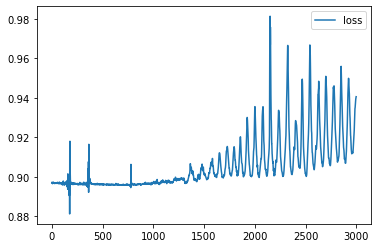

In [25]:
history = kuyf.fit(dataset,dataset,epochs=3000 ,batch_size=32)
pd.DataFrame(history.history).plot()

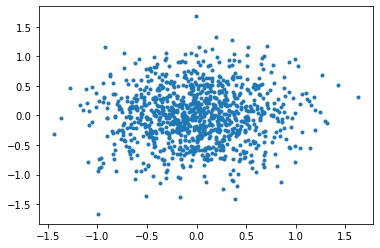

In [23]:
codings = tf.random.normal(shape=[1,coding_size])
new_gaussian_data = decoder(codings)
new_gaussian_data = tf.squeeze(new_gaussian_data)
new_gaussian_data
plt.plot(new_gaussian_data[0],new_gaussian_data[1],'.')

<Figure size 432x288 with 0 Axes>

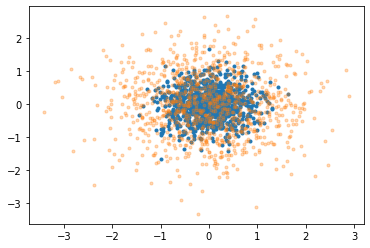

<Figure size 432x288 with 0 Axes>

In [24]:
plt.plot(new_gaussian_data[0],new_gaussian_data[1],'.')
plt.plot(dataset[0][0],dataset[0][1],'.',alpha=0.3)
plt.figure()

The VAE somehow produces gaussian like distributions only centered around 0 - FIXED ( fundamentally changed the latent and pushing loss funciton and that seemed to correct the problem althought the standard deviation is still lower than expected.

try to feed ringed data into the model now to see if something has changed 

In [8]:
def g(xy):
    new_z = [] # define the transformed list
    for z in xy: # for 
        z = np.array(z) # for each x,y point in the distribution
        new_z.append(z / 10 + z / np.linalg.norm(z)) # transform it via this transformation and append new z
    return new_z

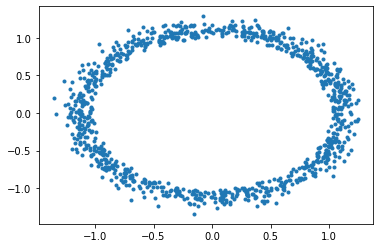

In [9]:
dataset = [(np.random.normal(0,1,1000),np.random.normal(0,1,1000)) for i in range (10)]

dataset_new = []
for i in range(10):
    x,y = dataset[i][0],dataset[i][1]
    xy = zip(x,y)
    res_z = g(xy)
    zx, zy = zip(*res_z)
    zx,zy = tf.constant(zx),tf.constant(zy)
    data = tf.stack([zx,zy])
    dataset_new.append(data)
dataset_new = tf.squeeze(tf.stack([dataset_new]))
plt.plot(dataset_new[4][0],dataset_new[4][1],'.') # try to change widths so that everything is contained within a range for the activation function
    

In [23]:
history = kuyf.fit(dataset_new,dataset_new,epochs=3000 ,batch_size=32)

Epoch 1/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.6385
Epoch 2/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.6363
Epoch 3/3000
1/1 [==============================] - 0s 31ms/step - loss: 0.6404
Epoch 4/3000
1/1 [==============================] - 0s 34ms/step - loss: 0.6386
Epoch 5/3000
1/1 [==============================] - 0s 31ms/step - loss: 0.6383
Epoch 6/3000
1/1 [==============================] - 0s 40ms/step - loss: 0.6352
Epoch 7/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.6417
Epoch 8/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.6380
Epoch 9/3000
1/1 [==============================] - 0s 38ms/step - loss: 0.6416
Epoch 10/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.6407
Epoch 11/3000
1/1 [==============================] - 0s 39ms/step - loss: 0.6348
Epoch 12/3000
1/1 [==============================] - 0s 46ms/step - loss: 0.6413
Epoch 13/3000
1/1 [==================

1/1 [==============================] - 0s 36ms/step - loss: 0.6405
Epoch 203/3000
1/1 [==============================] - 0s 31ms/step - loss: 0.6419
Epoch 204/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.6382
Epoch 205/3000
1/1 [==============================] - 0s 52ms/step - loss: 0.6381
Epoch 206/3000
1/1 [==============================] - 0s 45ms/step - loss: 0.6421
Epoch 207/3000
1/1 [==============================] - 0s 43ms/step - loss: 0.6367
Epoch 208/3000
1/1 [==============================] - 0s 54ms/step - loss: 0.6382
Epoch 209/3000
1/1 [==============================] - 0s 47ms/step - loss: 0.6424
Epoch 210/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.6330
Epoch 211/3000
1/1 [==============================] - 0s 46ms/step - loss: 0.6396
Epoch 212/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.6406
Epoch 213/3000
1/1 [==============================] - 0s 52ms/step - loss: 0.6384
Epoch 214/3000
1/1 [===========

1/1 [==============================] - 0s 34ms/step - loss: 0.6393
Epoch 303/3000
1/1 [==============================] - 0s 32ms/step - loss: 0.6409
Epoch 304/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.6394
Epoch 305/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.6371
Epoch 306/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.6431
Epoch 307/3000
1/1 [==============================] - 0s 38ms/step - loss: 0.6400
Epoch 308/3000
1/1 [==============================] - 0s 34ms/step - loss: 0.6400
Epoch 309/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.6374
Epoch 310/3000
1/1 [==============================] - 0s 33ms/step - loss: 0.6411
Epoch 311/3000
1/1 [==============================] - 0s 32ms/step - loss: 0.6398
Epoch 312/3000
1/1 [==============================] - 0s 34ms/step - loss: 0.6361
Epoch 313/3000
1/1 [==============================] - 0s 31ms/step - loss: 0.6443
Epoch 314/3000
1/1 [===========

1/1 [==============================] - 0s 35ms/step - loss: 0.6358
Epoch 403/3000
1/1 [==============================] - 0s 33ms/step - loss: 0.6368
Epoch 404/3000
1/1 [==============================] - 0s 34ms/step - loss: 0.6393
Epoch 405/3000
1/1 [==============================] - 0s 38ms/step - loss: 0.6353
Epoch 406/3000
1/1 [==============================] - 0s 32ms/step - loss: 0.6346
Epoch 407/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.6387
Epoch 408/3000
1/1 [==============================] - 0s 26ms/step - loss: 0.6392
Epoch 409/3000
1/1 [==============================] - 0s 38ms/step - loss: 0.6395
Epoch 410/3000
1/1 [==============================] - 0s 33ms/step - loss: 0.6384
Epoch 411/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.6419
Epoch 412/3000
1/1 [==============================] - 0s 33ms/step - loss: 0.6371
Epoch 413/3000
1/1 [==============================] - 0s 32ms/step - loss: 0.6356
Epoch 414/3000
1/1 [===========

1/1 [==============================] - 0s 28ms/step - loss: 0.6389
Epoch 503/3000
1/1 [==============================] - 0s 31ms/step - loss: 0.6356
Epoch 504/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.6354
Epoch 505/3000
1/1 [==============================] - 0s 33ms/step - loss: 0.6418
Epoch 506/3000
1/1 [==============================] - 0s 33ms/step - loss: 0.6357
Epoch 507/3000
1/1 [==============================] - 0s 26ms/step - loss: 0.6374
Epoch 508/3000
1/1 [==============================] - 0s 38ms/step - loss: 0.6374
Epoch 509/3000
1/1 [==============================] - 0s 33ms/step - loss: 0.6343
Epoch 510/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.6349
Epoch 511/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.6365
Epoch 512/3000
1/1 [==============================] - 0s 32ms/step - loss: 0.6353
Epoch 513/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.6373
Epoch 514/3000
1/1 [===========

1/1 [==============================] - 0s 27ms/step - loss: 0.6356
Epoch 603/3000
1/1 [==============================] - 0s 34ms/step - loss: 0.6368
Epoch 604/3000
1/1 [==============================] - 0s 26ms/step - loss: 0.6396
Epoch 605/3000
1/1 [==============================] - 0s 35ms/step - loss: 0.6408
Epoch 606/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.6397
Epoch 607/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.6359
Epoch 608/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.6417
Epoch 609/3000
1/1 [==============================] - 0s 31ms/step - loss: 0.6415
Epoch 610/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.6367
Epoch 611/3000
1/1 [==============================] - 0s 31ms/step - loss: 0.6358
Epoch 612/3000
1/1 [==============================] - 0s 31ms/step - loss: 0.6363
Epoch 613/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.6410
Epoch 614/3000
1/1 [===========

1/1 [==============================] - 0s 28ms/step - loss: 0.6337
Epoch 703/3000
1/1 [==============================] - 0s 32ms/step - loss: 0.6349
Epoch 704/3000
1/1 [==============================] - 0s 31ms/step - loss: 0.6375
Epoch 705/3000
1/1 [==============================] - 0s 40ms/step - loss: 0.6353
Epoch 706/3000
1/1 [==============================] - 0s 27ms/step - loss: 0.6426
Epoch 707/3000
1/1 [==============================] - 0s 26ms/step - loss: 0.6372
Epoch 708/3000
1/1 [==============================] - 0s 31ms/step - loss: 0.6396
Epoch 709/3000
1/1 [==============================] - 0s 38ms/step - loss: 0.6357
Epoch 710/3000
1/1 [==============================] - 0s 27ms/step - loss: 0.6356
Epoch 711/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.6355
Epoch 712/3000
1/1 [==============================] - 0s 33ms/step - loss: 0.6376
Epoch 713/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.6365
Epoch 714/3000
1/1 [===========

1/1 [==============================] - 0s 29ms/step - loss: 0.6355
Epoch 803/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.6354
Epoch 804/3000
1/1 [==============================] - 0s 27ms/step - loss: 0.6388
Epoch 805/3000
1/1 [==============================] - 0s 33ms/step - loss: 0.6337
Epoch 806/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.6377
Epoch 807/3000
1/1 [==============================] - 0s 26ms/step - loss: 0.6389
Epoch 808/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.6363
Epoch 809/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.6410
Epoch 810/3000
1/1 [==============================] - 0s 31ms/step - loss: 0.6371
Epoch 811/3000
1/1 [==============================] - 0s 34ms/step - loss: 0.6398
Epoch 812/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.6388
Epoch 813/3000
1/1 [==============================] - 0s 31ms/step - loss: 0.6385
Epoch 814/3000
1/1 [===========

1/1 [==============================] - 0s 36ms/step - loss: 0.6418
Epoch 903/3000
1/1 [==============================] - 0s 33ms/step - loss: 0.6350
Epoch 904/3000
1/1 [==============================] - 0s 27ms/step - loss: 0.6355
Epoch 905/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.6361
Epoch 906/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.6430
Epoch 907/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.6371
Epoch 908/3000
1/1 [==============================] - 0s 31ms/step - loss: 0.6377
Epoch 909/3000
1/1 [==============================] - 0s 27ms/step - loss: 0.6378
Epoch 910/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.6371
Epoch 911/3000
1/1 [==============================] - 0s 26ms/step - loss: 0.6383
Epoch 912/3000
1/1 [==============================] - 0s 33ms/step - loss: 0.6332
Epoch 913/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.6381
Epoch 914/3000
1/1 [===========

1/1 [==============================] - 0s 31ms/step - loss: 0.6409
Epoch 1003/3000
1/1 [==============================] - 0s 32ms/step - loss: 0.6411
Epoch 1004/3000
1/1 [==============================] - 0s 26ms/step - loss: 0.6416
Epoch 1005/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.6363
Epoch 1006/3000
1/1 [==============================] - 0s 27ms/step - loss: 0.6364
Epoch 1007/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.6353
Epoch 1008/3000
1/1 [==============================] - 0s 27ms/step - loss: 0.6371
Epoch 1009/3000
1/1 [==============================] - 0s 27ms/step - loss: 0.6409
Epoch 1010/3000
1/1 [==============================] - 0s 32ms/step - loss: 0.6353
Epoch 1011/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.6344
Epoch 1012/3000
1/1 [==============================] - 0s 31ms/step - loss: 0.6329
Epoch 1013/3000
1/1 [==============================] - 0s 32ms/step - loss: 0.6375
Epoch 1014/3000
1/1 

1/1 [==============================] - 0s 31ms/step - loss: 0.6398
Epoch 1199/3000
1/1 [==============================] - 0s 32ms/step - loss: 0.6365
Epoch 1200/3000
1/1 [==============================] - 0s 34ms/step - loss: 0.6377
Epoch 1201/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.6344
Epoch 1202/3000
1/1 [==============================] - 0s 27ms/step - loss: 0.6365
Epoch 1203/3000
1/1 [==============================] - 0s 40ms/step - loss: 0.6364
Epoch 1204/3000
1/1 [==============================] - 0s 27ms/step - loss: 0.6366
Epoch 1205/3000
1/1 [==============================] - 0s 27ms/step - loss: 0.6386
Epoch 1206/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.6434
Epoch 1207/3000
1/1 [==============================] - 0s 39ms/step - loss: 0.6395
Epoch 1208/3000
1/1 [==============================] - 0s 32ms/step - loss: 0.6413
Epoch 1209/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.6367
Epoch 1210/3000
1/1 

1/1 [==============================] - 0s 29ms/step - loss: 0.6341
Epoch 1395/3000
1/1 [==============================] - 0s 32ms/step - loss: 0.6375
Epoch 1396/3000
1/1 [==============================] - 0s 33ms/step - loss: 0.6385
Epoch 1397/3000
1/1 [==============================] - 0s 34ms/step - loss: 0.6389
Epoch 1398/3000
1/1 [==============================] - 0s 26ms/step - loss: 0.6352
Epoch 1399/3000
1/1 [==============================] - 0s 34ms/step - loss: 0.6360
Epoch 1400/3000
1/1 [==============================] - 0s 33ms/step - loss: 0.6353
Epoch 1401/3000
1/1 [==============================] - 0s 38ms/step - loss: 0.6386
Epoch 1402/3000
1/1 [==============================] - 0s 33ms/step - loss: 0.6305
Epoch 1403/3000
1/1 [==============================] - 0s 34ms/step - loss: 0.6393
Epoch 1404/3000
1/1 [==============================] - 0s 33ms/step - loss: 0.6344
Epoch 1405/3000
1/1 [==============================] - 0s 34ms/step - loss: 0.6356
Epoch 1406/3000
1/1 

1/1 [==============================] - 0s 30ms/step - loss: 0.6379
Epoch 1591/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.6380
Epoch 1592/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.6374
Epoch 1593/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.6371
Epoch 1594/3000
1/1 [==============================] - 0s 32ms/step - loss: 0.6398
Epoch 1595/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.6378
Epoch 1596/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.6354
Epoch 1597/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.6376
Epoch 1598/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.6363
Epoch 1599/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.6408
Epoch 1600/3000
1/1 [==============================] - 0s 34ms/step - loss: 0.6338
Epoch 1601/3000
1/1 [==============================] - 0s 31ms/step - loss: 0.6418
Epoch 1602/3000
1/1 

1/1 [==============================] - 0s 28ms/step - loss: 0.6366
Epoch 1787/3000
1/1 [==============================] - 0s 32ms/step - loss: 0.6421
Epoch 1788/3000
1/1 [==============================] - 0s 35ms/step - loss: 0.6386
Epoch 1789/3000
1/1 [==============================] - 0s 33ms/step - loss: 0.6394
Epoch 1790/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.6399
Epoch 1791/3000
1/1 [==============================] - 0s 32ms/step - loss: 0.6400
Epoch 1792/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.6380
Epoch 1793/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.6406
Epoch 1794/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.6402
Epoch 1795/3000
1/1 [==============================] - 0s 31ms/step - loss: 0.6394
Epoch 1796/3000
1/1 [==============================] - 0s 34ms/step - loss: 0.6438
Epoch 1797/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.6378
Epoch 1798/3000
1/1 

1/1 [==============================] - 0s 30ms/step - loss: 0.6344
Epoch 1983/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.6396
Epoch 1984/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.6390
Epoch 1985/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.6381
Epoch 1986/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.6386
Epoch 1987/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.6384
Epoch 1988/3000
1/1 [==============================] - 0s 26ms/step - loss: 0.6381
Epoch 1989/3000
1/1 [==============================] - 0s 35ms/step - loss: 0.6347
Epoch 1990/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.6359
Epoch 1991/3000
1/1 [==============================] - 0s 32ms/step - loss: 0.6362
Epoch 1992/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.6395
Epoch 1993/3000
1/1 [==============================] - 0s 32ms/step - loss: 0.6398
Epoch 1994/3000
1/1 

1/1 [==============================] - 0s 32ms/step - loss: 0.6396
Epoch 2179/3000
1/1 [==============================] - 0s 35ms/step - loss: 0.6416
Epoch 2180/3000
1/1 [==============================] - 0s 27ms/step - loss: 0.6356
Epoch 2181/3000
1/1 [==============================] - 0s 33ms/step - loss: 0.6394
Epoch 2182/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.6363
Epoch 2183/3000
1/1 [==============================] - 0s 25ms/step - loss: 0.6408
Epoch 2184/3000
1/1 [==============================] - 0s 32ms/step - loss: 0.6381
Epoch 2185/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.6391
Epoch 2186/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.6361
Epoch 2187/3000
1/1 [==============================] - 0s 39ms/step - loss: 0.6394
Epoch 2188/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.6373
Epoch 2189/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.6401
Epoch 2190/3000
1/1 

1/1 [==============================] - 0s 34ms/step - loss: 0.6385
Epoch 2375/3000
1/1 [==============================] - 0s 32ms/step - loss: 0.6378
Epoch 2376/3000
1/1 [==============================] - 0s 37ms/step - loss: 0.6396
Epoch 2377/3000
1/1 [==============================] - 0s 31ms/step - loss: 0.6370
Epoch 2378/3000
1/1 [==============================] - 0s 31ms/step - loss: 0.6393
Epoch 2379/3000
1/1 [==============================] - 0s 32ms/step - loss: 0.6397
Epoch 2380/3000
1/1 [==============================] - 0s 35ms/step - loss: 0.6370
Epoch 2381/3000
1/1 [==============================] - 0s 33ms/step - loss: 0.6361
Epoch 2382/3000
1/1 [==============================] - 0s 31ms/step - loss: 0.6376
Epoch 2383/3000
1/1 [==============================] - 0s 31ms/step - loss: 0.6350
Epoch 2384/3000
1/1 [==============================] - 0s 40ms/step - loss: 0.6352
Epoch 2385/3000
1/1 [==============================] - 0s 33ms/step - loss: 0.6378
Epoch 2386/3000
1/1 

1/1 [==============================] - 0s 30ms/step - loss: 0.6371
Epoch 2571/3000
1/1 [==============================] - 0s 34ms/step - loss: 0.6389
Epoch 2572/3000
1/1 [==============================] - 0s 34ms/step - loss: 0.6385
Epoch 2573/3000
1/1 [==============================] - 0s 31ms/step - loss: 0.6397
Epoch 2574/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.6364
Epoch 2575/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.6415
Epoch 2576/3000
1/1 [==============================] - 0s 27ms/step - loss: 0.6374
Epoch 2577/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.6380
Epoch 2578/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.6418
Epoch 2579/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.6387
Epoch 2580/3000
1/1 [==============================] - 0s 39ms/step - loss: 0.6406
Epoch 2581/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.6398
Epoch 2582/3000
1/1 

1/1 [==============================] - 0s 30ms/step - loss: 0.6447
Epoch 2767/3000
1/1 [==============================] - 0s 27ms/step - loss: 0.6430
Epoch 2768/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.6438
Epoch 2769/3000
1/1 [==============================] - 0s 38ms/step - loss: 0.6368
Epoch 2770/3000
1/1 [==============================] - 0s 32ms/step - loss: 0.6366
Epoch 2771/3000
1/1 [==============================] - 0s 26ms/step - loss: 0.6293
Epoch 2772/3000
1/1 [==============================] - 0s 27ms/step - loss: 0.6433
Epoch 2773/3000
1/1 [==============================] - 0s 39ms/step - loss: 0.6340
Epoch 2774/3000
1/1 [==============================] - 0s 27ms/step - loss: 0.6401
Epoch 2775/3000
1/1 [==============================] - 0s 29ms/step - loss: 0.6341
Epoch 2776/3000
1/1 [==============================] - 0s 32ms/step - loss: 0.6416
Epoch 2777/3000
1/1 [==============================] - 0s 33ms/step - loss: 0.6373
Epoch 2778/3000
1/1 

1/1 [==============================] - 0s 28ms/step - loss: 0.6324
Epoch 2963/3000
1/1 [==============================] - 0s 32ms/step - loss: 0.6370
Epoch 2964/3000
1/1 [==============================] - 0s 36ms/step - loss: 0.6378
Epoch 2965/3000
1/1 [==============================] - 0s 33ms/step - loss: 0.6402
Epoch 2966/3000
1/1 [==============================] - 0s 38ms/step - loss: 0.6376
Epoch 2967/3000
1/1 [==============================] - 0s 33ms/step - loss: 0.6356
Epoch 2968/3000
1/1 [==============================] - 0s 38ms/step - loss: 0.6391
Epoch 2969/3000
1/1 [==============================] - 0s 30ms/step - loss: 0.6347
Epoch 2970/3000
1/1 [==============================] - 0s 34ms/step - loss: 0.6358
Epoch 2971/3000
1/1 [==============================] - 0s 32ms/step - loss: 0.6356
Epoch 2972/3000
1/1 [==============================] - 0s 35ms/step - loss: 0.6382
Epoch 2973/3000
1/1 [==============================] - 0s 39ms/step - loss: 0.6328
Epoch 2974/3000
1/1 

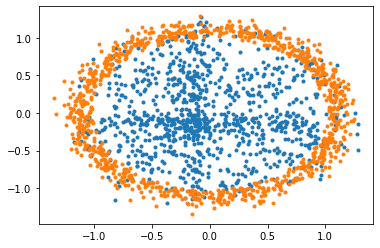

In [24]:
codings = tf.random.normal(shape=[1,coding_size])
new_data = decoder(codings)
new_data = tf.squeeze(new_data)
plt.plot(new_data[0],new_data[1],'.')
#plt.plot(dataset[0][0],dataset[0][1],'.',alpha=0.4)
plt.plot(dataset_new[4][0],dataset_new[4][1],'.')

We see we just need to train this model more effectively in order 

logbook of experiments:

Experimented with normal distribution : faster training time converges at around 0.75 MAE

increased the current neutrons by x10: training seemed to increase in time, but the minimal value for the loss was still around 0.75, interesting effect is that the data distribution of the generated values was more spread out.

Increased neutrons by 100x: extremely slow training per epoch as expected, data is as spread out as the 10x case, distribution takes on a shape of the dataset, even tought the dataset is slightly skewed, it just looks minituarised.

Added another layer in the sandwich with  10 neurons : for the same 300 epochs it reached a loss of 1.08, increasing the time for training to 1000 epochs. Loss is still plateauing at around 0.75

Lets try to change the activation functions from selu to relu: this seemed to work, albeit just a little, now the loss seems to converge at around 0.74, running 1000 epochs again. still the same result

Changing activation function from relu to tanh: loss still 0.73, converges faster

Changin loss to MSE : distribution looks more spread out loss of around 0.9 before it starts to diverge ( we hit a minimum)

CHanging the amount of hidden layers to 1000, 50,10 : no difference in MAE or MSE results, more training time

Changing output layer of encoder to relu,selu,linear,gelu : no difference in MAE or MSE

Im not quite sure if the model is either too simple to learn the standard deviation of the distribution

Tried changing the latent space dimension to see if it works :  no difference in MAE or MSE